<h1 style="color:orange">ANALYZING EFFECTS OF POLE POSITION ON THE RACE RESULTS</h1>

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb


In [51]:
results_df = pd.read_csv('datasets/cleaned/race_results.csv')
results_df.info()
results_df.head()
races_df = pd.read_csv('datasets/cleaned/races.csv')
circuits_df = pd.read_csv('datasets/original/circuits.csv')
set.difference(set([i for i in range(1,1087)])),set(results_df['raceId'].unique())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25660 entries, 0 to 25659
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       25660 non-null  int64  
 1   raceId           25660 non-null  int64  
 2   driverId         25660 non-null  int64  
 3   constructorId    25660 non-null  int64  
 4   grid             25660 non-null  int64  
 5   positionOrder    25660 non-null  int64  
 6   points           25660 non-null  float64
 7   laps             25660 non-null  int64  
 8   time             25660 non-null  object 
 9   milliseconds     6963 non-null   float64
 10  fastestLap       25660 non-null  float64
 11  rank             25660 non-null  float64
 12  fastestLapTime   25660 non-null  object 
 13  fastestLapSpeed  25660 non-null  float64
 14  statusId         25660 non-null  int64  
dtypes: float64(5), int64(8), object(2)
memory usage: 2.9+ MB


({1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  158,
  

<h4 style="color:LavenderBlush">Creating dataframe for every race on every circuit</h4>

In [52]:
results_df['positionOrder'].describe()
# finished_df = results_df[results_df['statusId'] == 1]
pole_df = results_df[results_df['grid'] == 1] # this gets all the winners
# finished_df.rename(columns={'grid':'startingPos','positionOrder':'finishPos'},)
races_df.head()
# finished_df.set_index('raceId').join(races_df.set_index('raceId'))
pole_circuit_df = pd.merge(pole_df,races_df,on='raceId')
pole_circuit_df = pd.merge(pole_circuit_df,circuits_df,on='circuitId')

In [53]:
# finished_circuit_df.drop(columns={'location','country', 'lat', 'lng','alt','round','name_y','date','url','circuitRef','time','points','laps','statusId'},inplace=True)
pole_circuit_df.head()
pole_results_df = pole_circuit_df[['raceId','driverId','circuitId','name_x','grid','positionOrder']]


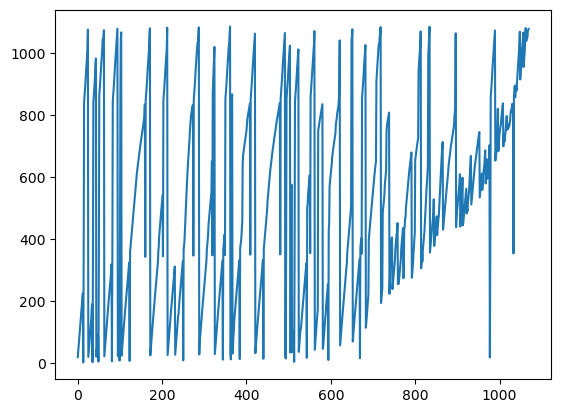

In [54]:

plt.plot(pole_results_df['raceId'].unique())

<h3 style="color:ForestGreen">Analysis of Pole-win Ratio</h3>

In [77]:
import operator
def pwrfor(groupId,relate,position):
    per_group_df = pole_results_df.groupby(groupId)
    group_poles = per_group_df.size()
    per_group_winner_df = pole_results_df[relate(pole_results_df['positionOrder'],position)].groupby(groupId)
    group_wins_poles = per_group_winner_df.size()
    group_pole_win_ratio = group_wins_poles/group_poles
    group_pole_win_ratio.index
    top20_df = group_pole_win_ratio.sort_values(ascending=False).head(20)
    bottom20_df = group_pole_win_ratio.sort_values().head(20)
    plt.bar(group_pole_win_ratio.index,group_pole_win_ratio)
    plt.title(f'Pole-Win Ratio vs {groupId}')
    plt.xlabel(f'{groupId}')
    plt.ylabel('Pole-Win Ratio')
    plt.show()
    plt.bar(top20_df.index,top20_df)
    plt.title(f'Top 20 Pole-Win Ratio vs {groupId}')
    plt.xlabel(f'{groupId}')
    plt.ylabel('Pole-Win Ratio')
    plt.show()
    plt.bar(bottom20_df.index,bottom20_df)
    plt.title(f'Bottom 20 Pole-Win Ratio vs {groupId}')
    plt.xlabel(f'{groupId}')
    plt.ylabel('Pole-Win Ratio')
    plt.show()
    


<h3 style="color:orange">Pole-Win Ratio per Circuit and Driver</h3>

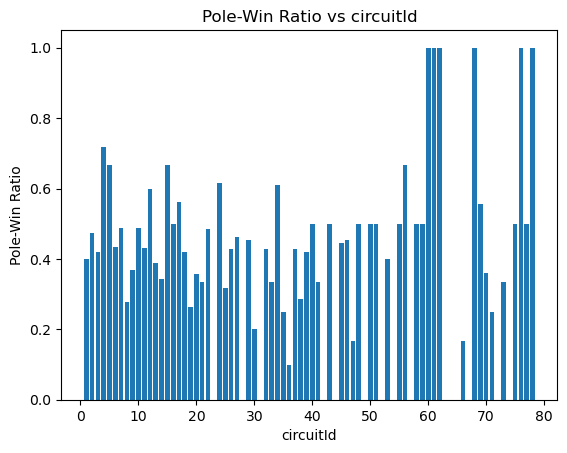

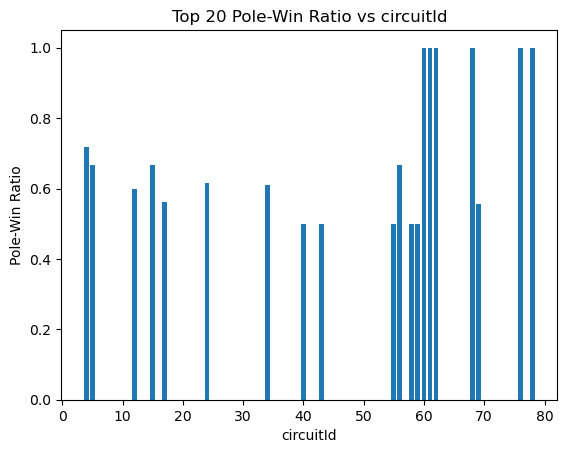

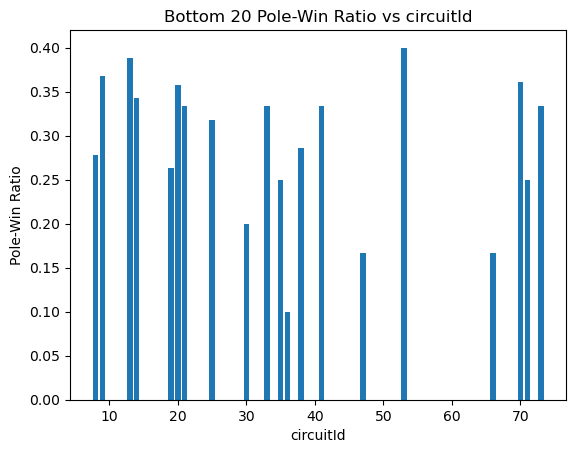

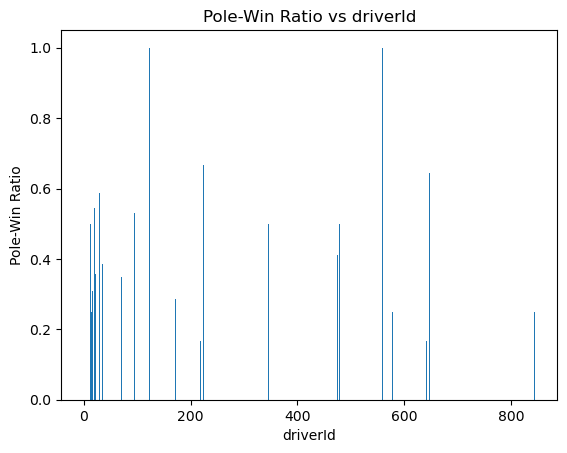

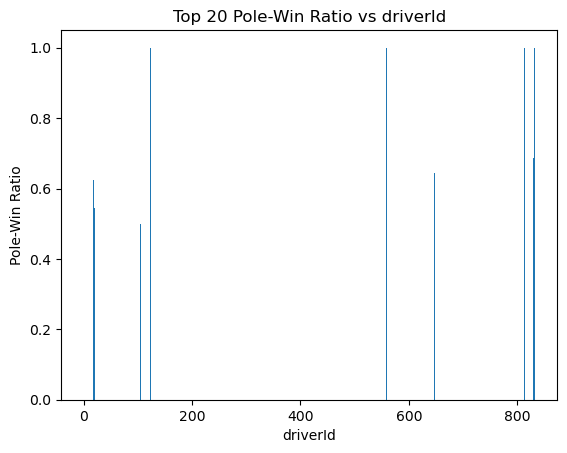

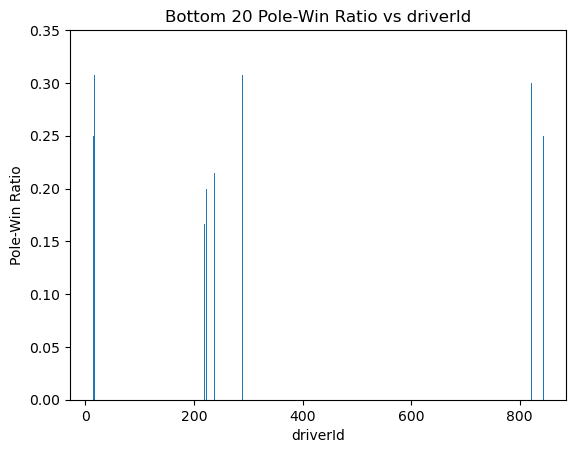

In [67]:
pwrfor('circuitId',operator.eq,1)
pwrfor('driverId',operator.eq,1)

<h3 style="color:orange">Pole-Top10 Ratio per Circuit and Driver</h3>

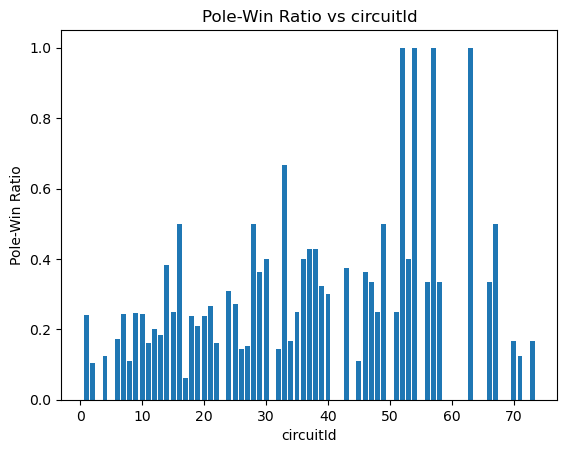

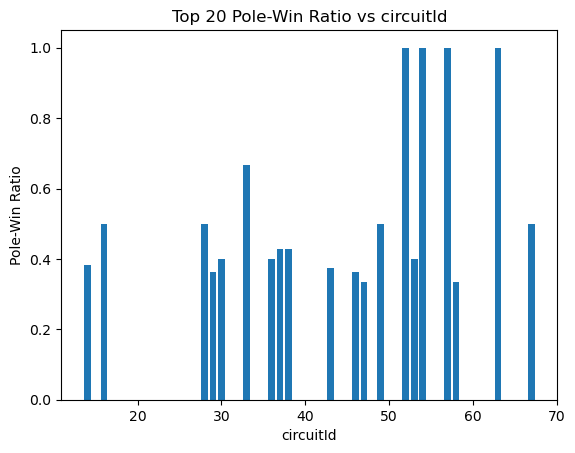

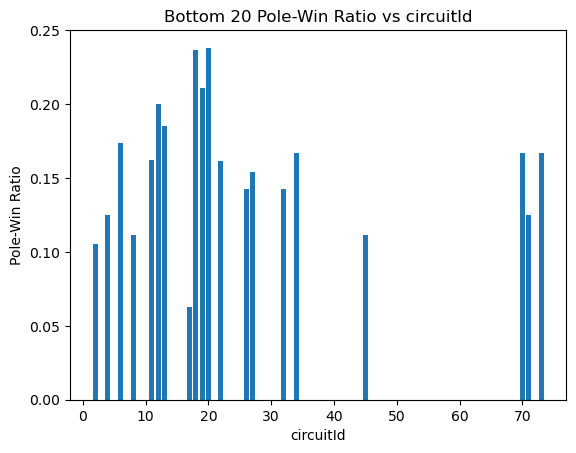

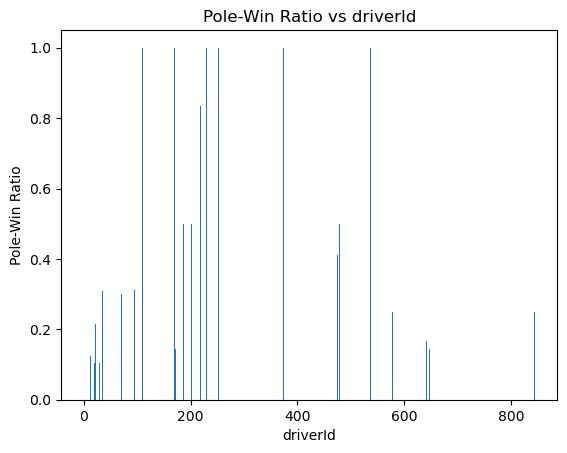

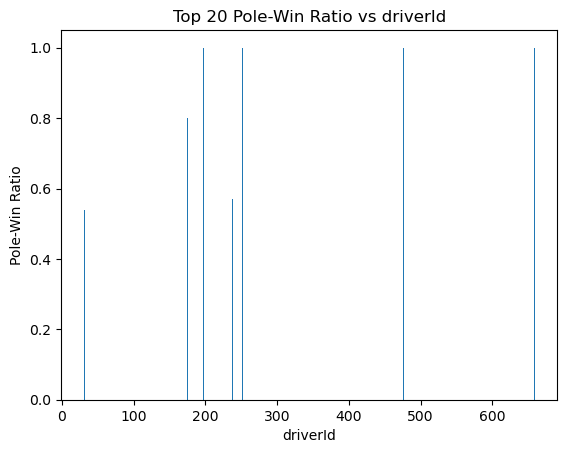

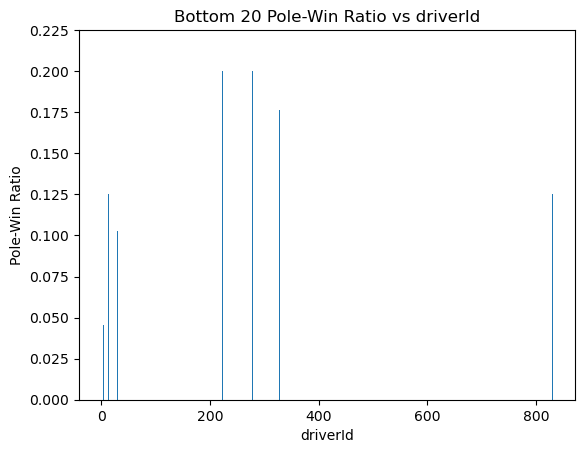

In [61]:
pwrfor('circuitId',operator.gt,11)
pwrfor('driverId',operator.gt,11)

In [83]:
dc_list = []
for driverId in pole_results_df['driverId'].values:
    for circuitId in pole_results_df['circuitId'].values:
        dc_df = pole_results_df[(pole_results_df['driverId']==driverId) & (pole_results_df['circuitId']==circuitId)]
        ispole = dc_df.size
        iswin = dc_df[dc_df['positionOrder']==1].size
        dc_list.append([driverId,circuitId,iswin/ispole])
dc_matrix = np.array(dc_list)
plt.imshow(dc_matrix,cmap='hot',interpolation='nearest')
    


/tmp/ipykernel_46609/2318190301.py:7: RuntimeWarning: invalid value encountered in long_scalars
  dc_list.append([driverId,circuitId,iswin/ispole])


KeyboardInterrupt: 

13     Autodromo Nazionale di Monza
70                Baku City Circuit
6         Circuit Gilles Villeneuve
7     Circuit de Nevers Magny-Cours
39                    Dijon-Prenois
9                    Hockenheimring
18      Indianapolis Motor Speedway
14        Marina Bay Street Circuit
11          Valencia Street Circuit
22               Yas Marina Circuit
117               Derek Warwick
182           François Hesnault
20         Giancarlo Fisichella
4             Heikki Kovalainen
95     Jean-Christophe Boullion
30           Juan Pablo Montoya
50                Justin Wilson
328               Mike Beuttler
1                 Nick Heidfeld
102                Éric Bernard


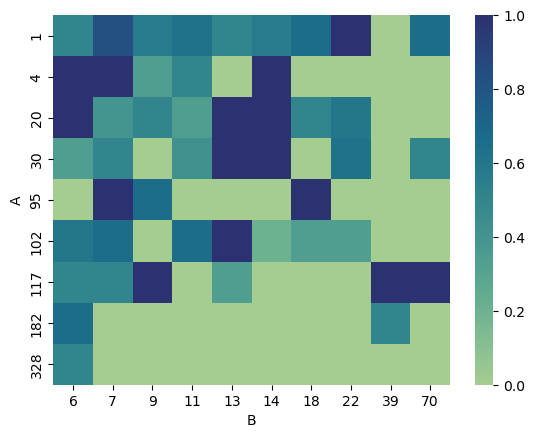

In [232]:
drivers_df = pd.read_csv('datasets/cleaned/drivers.csv')

res = pole_circuit_df[['driverId','circuitId','grid','positionOrder']]
res.rename(columns = {'driverId':"A",'circuitId':'B'},inplace=True)
res = res.groupby(['A','B']).apply(lambda dc :dc[dc['positionOrder']==1].size/dc.size)
dc_matrix = res.unstack(level=1).fillna(0)
dc_matrix['A']= dc_matrix.index
dc_matrix = dc_matrix.melt(id_vars="A",
        var_name="B", 
        value_name="value")
greatest_drivers = [1,30,20,117,102,4,50,95,328,182]
gd_df = dc_matrix[dc_matrix['A'].isin( greatest_drivers)]
greatest_circuits = [14,6,9,13,7,18,11,70,22,39]
gd_df = gd_df[gd_df['B'].isin(greatest_circuits)]



<h4 style="color:#00fa9a">Greatest Drivers</h4>

In [235]:
print(drivers_df.iloc[greatest_drivers]['name'].sort_values().to_string())


117               Derek Warwick
182           François Hesnault
20         Giancarlo Fisichella
4             Heikki Kovalainen
95     Jean-Christophe Boullion
30           Juan Pablo Montoya
50                Justin Wilson
328               Mike Beuttler
1                 Nick Heidfeld
102                Éric Bernard


<h4 style="color:#00fa9a">Greatest Circuits</h4>

In [236]:
print(circuits_df.iloc[greatest_circuits]['name'].sort_values().to_string())

13     Autodromo Nazionale di Monza
70                Baku City Circuit
6         Circuit Gilles Villeneuve
7     Circuit de Nevers Magny-Cours
39                    Dijon-Prenois
9                    Hockenheimring
18      Indianapolis Motor Speedway
14        Marina Bay Street Circuit
11          Valencia Street Circuit
22               Yas Marina Circuit


<AxesSubplot:xlabel='B', ylabel='A'>

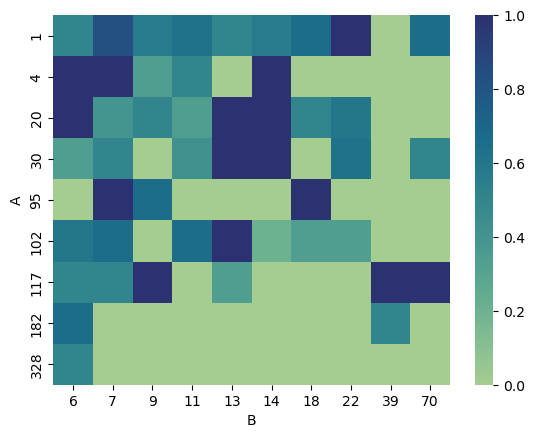

In [237]:
sb.heatmap(gd_df.pivot(index='A',columns='B',values='value'),cmap='crest')
